In [1]:
#from scipy.signal import savgol_filter
#import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from pandas.plotting import autocorrelation_plot
from matplotlib import ticker
#import sys
#sys.path.append('custom_modules')

#import Data_processing as dp
#import Data_visualization as dv

In [2]:
path_to_data = 'data\\Новые данные\\Run1\\run1_WM32_data.csv'
row_num = 22 # Номер строки, который мы хотим взять для анализа (от 0 до 114)
determ_nums = [0] # Какие измерения хотим посмотреть (от 0 до 30 или 31)

In [3]:
def get_df(path: str):
    df = pd.read_csv(path, delimiter=';')
    return df

In [4]:
# Чтение данных из файла
first_df = get_df(path_to_data)

In [5]:
# Удаляем пустые столбцы
print(first_df.shape)
first_df = first_df.T
for col in first_df.columns:
    first_df = first_df.loc[~first_df[col].isin(['--'])]
first_df = first_df.T
print(first_df.shape)

(115, 402)
(115, 399)


In [6]:
# Что прочли из файла
display(first_df)

,row,position,detector_0,detector_1,detector_2,detector_3,detector_4,detector_5,detector_6,detector_7,...,detector_390,detector_391,detector_392,detector_393,detector_394,detector_395,detector_396,detector_397,detector_398,detector_399
0,0,130675,"25.8:37.947,26.1:-54.259,26.2:61.709,26.3:-59....","25.6:33.941,25.8:-55.714,25.9:61.188,26.1:-60....","25.3:41.183,25.5:-54.553,25.7:61.709,25.8:-60....","25.6:45.607,25.8:-57.131,25.9:62.482,26.1:-61....","25.9:41.183,26.2:-55.136,26.3:61.709,26.5:-60....","25.8:40,26.1:-55.136,26.2:61.709,26.3:-60.663,...","25.5:48.332,25.7:-57.411,25.8:61.968,25.9:-61....","25.5:29.394,25.7:-32.496,25.7:47.329,25.9:-58....",...,"25.5:32.985,25.7:-50.279,25.8:53.963,25.9:-48....","25.9:35.777,26.1:-53.963,26.2:55.426,26.4:-48....","25.8:33.466,25.9:-51.225,26.1:48.662,26.3:-46....","25.6:37.947,25.8:-52.154,25.9:54.845,26.1:-51....","25.6:37.094,25.7:-53.367,25.9:51.536,26:-48.33...","25.6:26.533,25.8:33.941,26:-55.426,26.1:60.399...","25.5:30.463,25.6:29.933,25.8:-55.714,25.9:61.1...","25.3:32.985,25.5:-51.536,25.6:60.663,25.7:-57....","25.1:32,25.2:-30.463,25.3:34.871,25.5:-56.851,...","25.1:34.409,25.4:-52.46,25.5:60.399,25.7:-57.4..."
1,1,130676,"25.8:37.094,26:-55.426,26.1:61.188,26.3:-59.59...","25.6:35.327,25.9:-52.154,26:60.926,26.1:-59.59...","25.3:40.792,25.5:-55.426,25.7:61.968,25.8:-60....","25.6:40,25.8:-48,25.9:46.989,25.9:-52.764,26.1...","25.9:41.952,26.2:-54.553,26.3:61.709,26.5:-60....","25.6:41.183,25.8:-51.536,25.9:-51.536,26:60.92...","25.5:47.666,25.7:-57.966,25.8:61.968,25.9:-61....","25.8:-29.394,25.9:35.777,25.9:-44.181,26:48.33...",...,"25.5:33.941,25.7:-48,25.8:57.411,25.9:-53.666,...","25.9:38.367,26.1:-49.96,26.3:55.714,26.4:-50.5...","25.8:35.777,26:-50.279,26.2:54.553,26.3:-47.66...","24.7:23.324,25.7:39.598,25.8:-53.066,26:54.259...","25.5:24.658,25.7:-40,25.8:-56,25.9:59.599,26.1...","25.6:26.533,25.8:40,26:-54.553,26.1:60.926,26....","25.3:28.284,25.4:32.985,25.7:-56.851,25.8:61.1...","25.3:30.463,25.5:-53.066,25.7:59.867,25.8:-55....","25:29.394,25.1:30.984,25.3:-56.851,25.5:61.188...","25:34.409,25.3:-55.426,25.4:61.188,25.5:-59.05..."
2,2,130677,"25.6:34.409,25.8:-57.966,25.9:61.968,26.1:-60....","25.5:36.222,25.7:-48.99,25.8:60.133,25.9:-59.0...","25.5:40.398,25.7:-56.851,25.8:62.225,25.9:-61....","25.6:31.496,25.7:-35.327,25.9:39.192,26:-58.51...","25.8:41.183,26.1:-52.154,26.2:60.926,26.3:-59....","25.6:41.569,25.9:-51.536,26:61.188,26.1:-60.39...","25.5:44.9,25.7:-54.259,25.8:61.709,25.9:-60.66...","25.9:-29.933,26.1:40.398,26.2:-40.792,26.3:-58...",...,"25.5:38.781,25.7:-55.426,25.8:59.599,25.9:-54....","25.9:37.523,26.1:-53.963,26.3:59.33,26.4:-57.1...","25.8:35.327,25.9:-44.9,26:-35.327,26.1:53.367,...","24.7:27.129,24.8:-25.298,25.7:36.661,25.9:-56....","25.5:25.298,25.6:32,25.8:-54.553,25.9:59.33,26...","25.6:27.713,25.8:40.398,26:-53.666,26.1:60.663...","25.3:29.394,25.4:-27.713,25.7:-57.131,25.8:61....","25.1:30.463,25.3:35.777,25.5:-54.259,25.6:60.9...","25.3:29.394,25.5:-56.569,25.6:60.663,25.7:-58....","25:34.871,25.1:-35.327,25.3:-51.846,25.4:60.39..."
3,3,130678,"25.5:37.094,25.8:-51.536,25.9:60.926,26:-58.51...","25.5:35.327,25.7:-54.845,25.8:61.709,25.9:-60....","25.3:30.463,25.5:-28.844,25.7:-59.599,25.8:62....","25.8:40,25.9:-45.957,26.1:-52.764,26.2:60.399,...","25.8:41.569,25.9:-46.989,26.1:-59.059,26.2:62....","25.6:41.569,25.9:-51.536,26:60.663,26.1:-59.33...","25.5:41.569,25.7:-56.569,25.8:61.968,25.9:-60....","26.1:34.871,26.2:-41.183,26.3:40.398,26.5:-56....",...,"25.5:38.781,25.7:-52.154,25.8:59.33,25.9:-55.1...","26.1:36.222,26.3:-55.136,26.4:60.133,26.5:-57....","25.8:37.094,25.9:-41.569,26.1:-54.259,26.2:59....","25.6:36.661,25.7:-47.666,25.9:-51.536,26:58.24...","25.6:26.533,25.7:32.496,25.8:-46.989,26:-49.96...","25.6:26.533,25.8:27.129,25.9:32.496,26:-57.411...","25.3:30.463,25.5:32.985,25.7:-52.154,25.8:60.3...","25.1:29.933,25.3:32,25.5:-53.666,25.6:60.399,2...","25.3:35.327,25.5:-53.666,25.6:61.188,25.7:-58....","25:33.466,2

In [7]:
# Вырезаем интересующую строку из начального датафрейма
# Разделяем значения её ячеек по строкам (разделитель - ","). Считаем каждый датчик провел 31 измерение за 1 пуск 
# Выводим полученный датафрейм со столбцами - номерами датчиков и строками - номерами измерений
# В каждой ячейке пара время + амплитуда 

# Датафрейм со всеми измерениями без деления на время и амплитуду
#determines_df = first_df.iloc[:1,2:].squeeze().str.split(pat=',', expand=True).T
determines_df = first_df.iloc[row_num,2:].str.split(pat=',', expand=True).T
display(determines_df)

,detector_0,detector_1,detector_2,detector_3,detector_4,detector_5,detector_6,detector_7,detector_8,detector_9,...,detector_390,detector_391,detector_392,detector_393,detector_394,detector_395,detector_396,detector_397,detector_398,detector_399
0,24.7:27.713,25.6:32.496,25.5:40.398,25.5:41.183,25.3:41.952,25.8:40.398,25.8:38.367,25.8:35.777,25:43.451,25.9:40.792,...,26.4:26.533,26.6:-25.923,25.9:32.985,26.3:33.941,26.1:26.533,25.8:27.713,25.6:34.871,25.5:30.463,25.5:29.394,25.3:27.713
1,24.9:-36.661,25.9:-53.666,25.7:-56,25.7:-54.553,25.5:-54.845,26:-56,26:-53.066,25.9:-47.666,25.1:-49.639,26.3:-53.066,...,26.5:-42.332,26.7:39.598,26:-32.985,26.4:-52.46,26.3:-28.844,25.9:-32.496,25.9:-56,25.5:-30.463,25.6:-30.463,25.4:28.844
2,25:45.957,26:61.449,25.8:62.225,25.9:61.709,25.7:62.225,26.1:61.968,26.1:61.709,26.1:48.332,25.2:-57.411,26.4:61.188,...,26.6:45.957,26.9:-58.515,26.2:-51.846,26.6:56.285,26.5:40.792,26.1:38.367,26.1:61.449,25.7:40,25.7:33.941,25.6:-53.367
3,25.2:-57.689,26.1:-60.133,25.9:-61.188,26:-59.867,25.8:-61.188,26.2:-60.926,26.3:-60.399,26.3:-39.598,25.3:62.225,26.5:-59.33,...,26.7:-54.259,26.9:61.188,26.3:58.241,26.7:-55.426,26.6:-58.788,26.2:-57.966,26.2:-59.33,25.8:-55.714,25.9:-53.963,25.7:59.867
4,25.3:61.188,26.2:55.426,26.1:58.788,26.1:54.553,25.9:59.059,26.3:59.059,26.4:55.136,26.4:36.661,25.5:-60.926,26.6:53.963,...,26.8:57.131,27.1:-58.515,26.5:-51.846,26.9:51.225,26.7:61.709,26.3:61.188,26.3:55.714,25.9:61.449,26:60.663,25.8:-55.714
5,25.4:-58.241,26.4:-43.818,26.3:-49.639,26.3:-43.451,26.1:-46.648,26.5:-46.303,26.6:-49.315,26.5:-33.941,25.6:57.411,26.8:-49.315,...,27:-51.225,27.2:54.845,26.6:41.569,27:-46.989,26.8:-59.059,26.5:-58.241,26.5:-46.989,26.1:-57.131,26.1:-56.851,25.9:47.666
6,25.5:53.066,26.5:41.183,26.4:48.332,26.4:43.818,26.2:46.648,26.6:48,26.7:48.332,26.7:32.496,25.8:-49.639,26.9:46.303,...,27.1:39.598,27.3:-48.99,26.8:-44.542,27.2:34.409,27:55.426,26.6:55.426,26.6:45.255,26.2:54.553,26.3:48.332,26.1:-46.648
7,25.7:-46.648,28.9:47.666,26.5:-38.367,28.8:49.639,26.3:-37.947,26.7:-41.569,26.8:-36.661,26.9:-32.496,25.9:48,27:-35.327,...,27.2:-41.569,27.4:48.662,26.9:47.329,27.3:-32.496,27.1:-47.666,26.7:-50.279,28.9:48.662,26.3:-47.666,26.4:-46.303,26.4:36.661
8,25.9:41.183,29:-56,28.8:49.96,28.9:-57.131,28.5:51.536,29:49.315,29.1:49.315,27:36.661,26:-35.777,29.3:49.639,...,27.3:38.367,27.5:-40,27.1:-39.192,27.4:42.332,27.2:48.332,26.9:45.607,29:-55.714,26.6:41.569,26.5:38.367,26.5:-34.409
9,26.1:24.658,29.1:55.136,28.9:-57.966,29:55.426,28.6:-57.689,29.1:-57.411,29.2:-57.131,27.1:-35.777,26.4:-27.713,29.3:-57.411,...,27.5:32.496,27.7:32,27.2:39.598,27.5:-44.9,27.3:-37.947,29:43.818,29.1:51.846,28.8:48,28.9:46.303,26.7:27.713


In [8]:
# Берем 1 строку из determines_df, то есть определенный номер измерения для всех датчиков
# Делим пары чисел в ячейках на столбцы "Время" и "Амплитуда"

# Список из датафреймов, каждый из которых описывает время и амплитуду раздельно для каждого измерения
divided_determines_dfs_list = list()

for i in determ_nums:
    temp = determines_df.iloc[i,:].str.split(pat=':', expand=True).T
    temp.rename(index = {0 : 'Time', 1: 'Amplitude'}, inplace = True)
    temp = temp.T
    temp = temp.astype(float)
    print(temp.dtypes)
    divided_determines_dfs_list.append(temp)

Time         float64
Amplitude    float64
dtype: object


In [9]:
# Вывод датафреймов, описывающих измерения и номера этих измерений для проверки
# Номер измерения НАД датафреймом
# кол-во элементов в determ_nums и divided_determines_dfs_list равно
itr = iter(determ_nums)
for df_item in divided_determines_dfs_list:
    print(f"Для измерения номер: {next(itr)}")
    display(df_item.T)

Для измерения номер: 0


,detector_0,detector_1,detector_2,detector_3,detector_4,detector_5,detector_6,detector_7,detector_8,detector_9,...,detector_390,detector_391,detector_392,detector_393,detector_394,detector_395,detector_396,detector_397,detector_398,detector_399
Time,24.700,25.600,25.500,25.500,25.300,25.800,25.800,25.800,25.000,25.900,...,26.400,26.600,25.900,26.300,26.100,25.800,25.600,25.500,25.500,25.300
Amplitude,27.713,32.496,40.398,41.183,41.952,40.398,38.367,35.777,43.451,40.792,...,26.533,-25.923,32.985,33.941,26.533,27.713,34.871,30.463,29.394,27.713


In [10]:
# Считаем что выводим только 1 измерение (номер 0)
# Можно посмотреть ВСЕ значения времени и амплитуды для 22 строки исходного .csv файла
# Измерение (т.е. номер одной из пар чисел в каждой ячейке) - 0
i = 0
while(i < 400):
    display(divided_determines_dfs_list[0].T.iloc[:,i:i + 10])
    i+=10

,detector_0,detector_1,detector_2,detector_3,detector_4,detector_5,detector_6,detector_7,detector_8,detector_9
Time,24.700,25.600,25.500,25.500,25.300,25.800,25.800,25.800,25.000,25.900
Amplitude,27.713,32.496,40.398,41.183,41.952,40.398,38.367,35.777,43.451,40.792


,detector_10,detector_11,detector_12,detector_13,detector_14,detector_15,detector_16,detector_17,detector_18,detector_19
Time,25.900,25.900,25.500,25.800,25.600,25.600,25.600,25.500,25.500,25.3
Amplitude,44.542,45.607,27.129,38.781,35.327,32.496,39.598,35.327,37.947,44.9


,detector_20,detector_21,detector_22,detector_23,detector_24,detector_25,detector_26,detector_27,detector_28,detector_29
Time,26.400,26.100,26.100,26.100,26.700,26.400,26.100,26.300,26.900,26.400
Amplitude,27.713,25.923,30.463,34.409,37.947,33.941,37.947,36.222,35.327,41.183


,detector_30,detector_31,detector_32,detector_33,detector_34,detector_35,detector_36,detector_37,detector_38,detector_39
Time,26.300,26.300,26.7,26.400,26.100,26.100,26.400,26.300,25.900,25.800
Amplitude,43.451,39.192,40.0,38.781,45.607,41.183,33.466,39.598,35.327,46.648


,detector_40,detector_41,detector_42,detector_43,detector_44,detector_45,detector_46,detector_47,detector_48,detector_49
Time,25.900,25.800,25.600,25.500,26.300,26.400,25.8,25.600,26.400,26.600
Amplitude,32.496,30.984,34.871,37.523,36.222,37.094,40.0,37.523,36.222,34.409


,detector_50,detector_51,detector_52,detector_53,detector_54,detector_55,detector_56,detector_57,detector_58,detector_59
Time,26.100,25.800,26.400,26.600,26.100,25.600,26.400,26.300,25.900,25.600
Amplitude,37.094,42.332,30.984,33.466,39.598,38.367,35.327,29.394,32.985,33.466


,detector_60,detector_61,detector_62,detector_63,detector_64,detector_65,detector_66,detector_67,detector_68,detector_69
Time,25.600,25.600,25.800,26.400,25.900,25.800,25.900,26.600,26.100,26.100
Amplitude,37.523,44.181,37.094,34.409,44.181,44.181,33.466,35.327,38.367,41.183


,detector_70,detector_71,detector_72,detector_73,detector_74,detector_75,detector_76,detector_77,detector_78,detector_79
Time,26.300,26.600,26.300,26.300,26.600,26.600,26.3,26.100,26.600,26.900
Amplitude,31.496,37.947,43.451,38.781,34.871,31.496,40.0,41.183,29.933,24.658


,detector_80,detector_81,detector_82,detector_83,detector_84,detector_85,detector_86,detector_87,detector_88,detector_89
Time,25.900,25.900,25.500,24.800,26.400,25.900,25.300,24.800,26.600,26.100
Amplitude,30.984,35.777,37.523,39.192,27.713,34.409,42.332,40.792,33.941,29.394


,detector_90,detector_91,detector_92,detector_93,detector_94,detector_95,detector_96,detector_97,detector_98,detector_99
Time,25.500,25.000,26.700,26.300,25.500,25.000,26.900,25.900,25.300,24.800
Amplitude,38.781,38.367,40.398,34.871,37.947,39.598,36.222,30.463,37.094,35.777


,detector_100,detector_101,detector_102,detector_103,detector_104,detector_105,detector_106,detector_107,detector_108,detector_109
Time,25.800,25.900,26.400,26.100,25.900,26.300,26.600,26.100,26.100,26.3
Amplitude,34.871,36.661,41.183,36.222,41.569,44.181,44.542,32.496,46.648,44.9


,detector_110,detector_111,detector_112,detector_113,detector_114,detector_115,detector_116,detector_117,detector_118,detector_119
Time,26.700,26.400,25.900,26.300,27.200,26.9,25.800,25.900,26.900,25.900
Amplitude,39.598,29.394,44.181,41.952,29.394,24.0,39.598,35.777,-34.871,24.658


,detector_120,detector_121,detector_122,detector_123,detector_124,detector_125,detector_126,detector_127,detector_128,detector_129
Time,26.100,26.400,26.3,26.400,26.900,26.700,26.700,26.700,26.700,26.900
Amplitude,27.713,26.533,32.0,30.984,30.463,44.181,46.648,42.332,-23.324,42.332


,detector_130,detector_131,detector_132,detector_133,detector_134,detector_135,detector_136,detector_137,detector_138,detector_139
Time,26.9,26.900,26.100,26.700,26.700,26.900,26.600,26.600,26.600,26.700
Amplitude,44.9,43.451,-23.324,42.708,45.255,35.327,-24.658,34.409,42.708,41.569


,detector_140,detector_141,detector_142,detector_143,detector_144,detector_145,detector_146,detector_147,detector_148,detector_149
Time,26.100,25.900,25.800,25.100,26.300,25.900,25.800,24.700,26.300,25.900
Amplitude,35.777,40.398,39.598,39.192,43.081,43.818,37.523,28.284,44.181,45.957


,detector_150,detector_151,detector_152,detector_153,detector_154,detector_156,detector_157,detector_158,detector_159,detector_160
Time,26.300,25.500,26.1,25.900,26.300,25.800,25.800,25.300,25.100,25.800
Amplitude,40.792,28.284,44.9,47.329,28.844,29.933,42.708,34.409,35.327,30.984


,detector_161,detector_162,detector_163,detector_164,detector_165,detector_166,detector_167,detector_168,detector_169,detector_170
Time,25.500,25.000,24.7,25.900,25.500,25.300,24.7,26.100,25.800,25.000
Amplitude,33.466,35.777,32.0,30.984,32.985,33.466,24.0,36.661,41.952,25.298


,detector_171,detector_172,detector_173,detector_174,detector_175,detector_176,detector_177,detector_178,detector_179,detector_180
Time,25.100,26.300,25.800,25.500,24.800,26.400,25.600,25.100,24.800,25.900
Amplitude,36.222,39.192,44.542,37.947,-25.298,35.327,32.985,33.466,41.569,28.844


,detector_181,detector_183,detector_184,detector_185,detector_186,detector_187,detector_188,detector_189,detector_190,detector_191
Time,26.600,26.1,26.700,27.100,28.300,26.300,26.600,25.900,27.500,26.400
Amplitude,24.658,24.0,35.777,33.466,43.081,27.129,30.984,24.658,25.923,27.129


,detector_192,detector_193,detector_194,detector_195,detector_196,detector_197,detector_198,detector_199,detector_200,detector_201
Time,26.600,26.600,27.100,25.800,25.900,25.800,26.100,25.500,25.500,25.500
Amplitude,41.183,38.781,-27.713,30.984,25.923,24.658,23.324,30.984,24.658,30.984


,detector_202,detector_203,detector_204,detector_205,detector_206,detector_207,detector_208,detector_209,detector_210,detector_211
Time,25.100,24.500,25.300,25.300,24.800,19.1,25.100,25.100,24.800,24.500
Amplitude,41.183,35.777,27.129,41.569,40.792,24.0,38.367,43.818,42.332,37.094


,detector_212,detector_213,detector_214,detector_215,detector_216,detector_217,detector_218,detector_219,detector_220,detector_221
Time,25.100,25.100,25.000,24.500,25.100,25.000,24.800,24.300,25.800,25.800
Amplitude,41.569,42.708,41.952,40.792,30.984,30.984,37.094,33.941,36.661,37.094


,detector_223,detector_224,detector_225,detector_226,detector_227,detector_228,detector_229,detector_230,detector_231,detector_232
Time,25.500,26.100,25.900,26.100,25.900,26.300,25.900,26.400,25.900,26.1
Amplitude,32.496,39.598,45.255,37.947,27.129,40.792,43.081,29.394,31.496,40.0


,detector_233,detector_234,detector_235,detector_236,detector_237,detector_238,detector_239,detector_240,detector_241,detector_242
Time,23.1,26.1,25.800,26.100,25.600,25.800,25.3,25.800,25.900,25.900
Amplitude,24.0,24.0,32.985,34.409,30.984,24.658,24.0,30.984,37.094,41.569


,detector_243,detector_244,detector_245,detector_246,detector_247,detector_248,detector_249,detector_250,detector_251,detector_252
Time,26.100,26.100,26.100,26.100,26.100,26.100,26.100,25.900,25.900,25.800
Amplitude,45.255,37.523,44.542,44.181,40.792,35.327,43.451,36.222,41.183,37.094


,detector_253,detector_254,detector_255,detector_256,detector_257,detector_258,detector_259,detector_260,detector_261,detector_262
Time,25.800,25.800,25.600,25.5,25.600,25.500,25.100,25.500,25.500,25.600
Amplitude,42.708,45.957,44.542,-24.0,33.466,34.409,30.463,37.947,46.648,32.496


,detector_263,detector_264,detector_265,detector_266,detector_267,detector_268,detector_269,detector_270,detector_271,detector_272
Time,26.300,25.800,25.6,25.8,26.600,25.900,25.800,26.100,26.600,26.400
Amplitude,36.661,33.941,40.0,40.0,24.658,30.984,30.984,33.941,31.496,39.192


,detector_273,detector_274,detector_275,detector_276,detector_277,detector_278,detector_279,detector_280,detector_281,detector_282
Time,26.100,26.300,25.800,26.300,25.900,25.600,25.300,26.300,26.300,25.800
Amplitude,41.952,28.844,28.844,41.952,39.192,32.496,32.496,-24.658,27.713,34.409


,detector_283,detector_284,detector_285,detector_286,detector_287,detector_288,detector_289,detector_290,detector_291,detector_292
Time,25.500,26.700,26.700,26.1,25.800,27.5,27.900,26.700,26.7,28.2
Amplitude,35.327,-25.923,25.923,32.0,32.985,24.0,-25.298,26.533,32.0,24.0


,detector_293,detector_294,detector_295,detector_296,detector_297,detector_298,detector_299,detector_300,detector_301,detector_302
Time,28.700,27.700,26.600,28.2,28.000,26.400,24.800,25.500,25.800,25.900
Amplitude,28.284,34.871,27.129,-24.0,29.394,-42.708,25.923,28.284,32.985,41.952


,detector_303,detector_304,detector_305,detector_306,detector_307,detector_308,detector_309,detector_310,detector_311,detector_312
Time,26.300,25.900,25.900,26.100,26.400,26.100,26.300,26.100,26.600,26.300
Amplitude,45.957,37.523,41.183,37.947,37.947,42.708,46.989,45.957,31.496,46.989


,detector_313,detector_314,detector_315,detector_316,detector_317,detector_318,detector_319,detector_320,detector_321,detector_322
Time,26.300,26.300,26.4,26.300,26.3,26.300,26.300,25.800,25.500,25.300
Amplitude,45.957,41.183,40.0,44.542,44.9,45.255,44.181,36.661,36.661,29.394


,detector_323,detector_324,detector_325,detector_326,detector_327,detector_328,detector_329,detector_330,detector_331,detector_332
Time,25.100,25.800,25.800,25.800,25.800,25.800,26.300,26.300,26.100,25.500
Amplitude,30.463,40.792,28.844,30.984,29.394,31.496,40.398,43.081,43.451,37.094


,detector_333,detector_334,detector_335,detector_336,detector_337,detector_338,detector_339,detector_340,detector_341,detector_342
Time,26.100,26.100,26.100,25.300,26.100,25.800,25.800,26.900,26.300,25.900
Amplitude,45.255,42.332,43.081,34.409,35.327,40.398,41.183,36.661,31.496,40.792


,detector_343,detector_344,detector_345,detector_346,detector_347,detector_348,detector_349,detector_350,detector_351,detector_352
Time,25.600,26.700,26.300,25.900,25.800,26.600,26.100,25.900,25.900,26.4
Amplitude,25.298,37.947,38.781,42.332,37.523,32.496,35.777,41.569,39.192,32.0


,detector_353,detector_354,detector_355,detector_356,detector_357,detector_358,detector_359,detector_360,detector_361,detector_362
Time,25.900,25.600,25.900,25.5,25.300,25.100,25.900,24.700,25.300,25.100
Amplitude,29.933,29.394,45.255,24.0,33.466,35.327,38.781,35.327,37.947,43.451


,detector_363,detector_364,detector_365,detector_366,detector_367,detector_368,detector_369,detector_370,detector_371,detector_372
Time,25.100,24.700,25.300,25.100,24.800,25.0,25.300,25.100,25.100,25.000
Amplitude,42.708,42.708,37.094,44.181,39.598,40.0,41.952,42.332,44.181,42.708


,detector_373,detector_374,detector_375,detector_376,detector_377,detector_378,detector_379,detector_380,detector_381,detector_382
Time,25.500,25.300,25.1,25.100,25.500,25.300,25.100,25.600,26.400,27.5
Amplitude,37.523,37.947,40.0,40.398,34.409,36.222,34.409,25.923,23.324,32.0


,detector_383,detector_384,detector_385,detector_386,detector_387,detector_388,detector_389,detector_390,detector_391,detector_392
Time,26.600,26.300,26.600,27.2,26.900,25.900,26.300,26.400,26.600,25.900
Amplitude,-23.324,42.332,28.844,24.0,34.871,38.367,37.094,26.533,-25.923,32.985


,detector_393,detector_394,detector_395,detector_396,detector_397,detector_398,detector_399
Time,26.300,26.100,25.800,25.600,25.500,25.500,25.300
Amplitude,33.941,26.533,27.713,34.871,30.463,29.394,27.713


P.s. В каждой ячейке по 30-31 пар значений, мы решили ,что это количество измерений одной и той же волны пущенной в начале


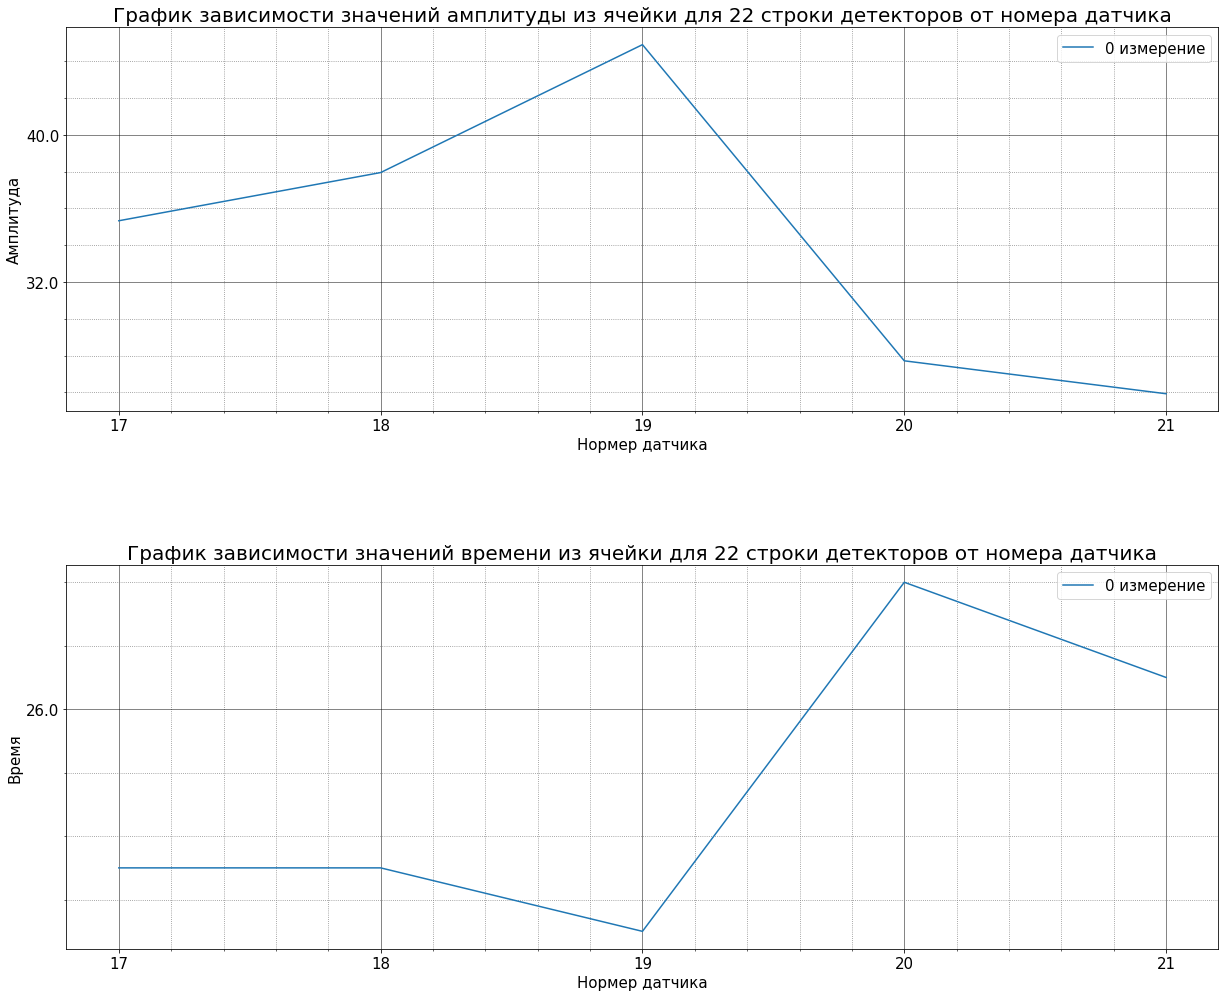

In [11]:
# Рисуем 2 графика - один с зависимостью времения от номера датчика, 
# другой с зависимостью амплитуды от номера датчика
# номера датчиков условны (3 столбца были удалены в начале, т.е. измерения для 3 датчиков)



# P.s надо ручками настроить интервалы между соседними значениями по осям x и y для обоих графиков
# Настраивать здесь:
######################
first_graph_x_ticker = 1
first_graph_y_ticker = 8
second_graph_x_ticker = 1
second_graph_y_ticker = 1
detecters_left_border = 17
detecters_right_border = 22 #divided_determines_dfs_list[0].shape[0]
######################



fig, ax = plt.subplots(2,1)

fig.set_figwidth(20)
fig.set_figheight(16)

#######################################################################################

#ax[0].plot(np.linspace(0,397,397), demention_1_df['Amplitude'], label='1 измерение')

itr = iter(determ_nums)
for df_item in divided_determines_dfs_list:
    ax[0].plot([i for i in range(detecters_left_border, detecters_right_border)], 
    df_item['Amplitude'][detecters_left_border:detecters_right_border], label=f"{next(itr)} измерение") 
               #marker='^', markerfacecolor='red', markersize=8)

ax[0].set_xlabel('Нормер датчика', fontsize=15)
ax[0].set_ylabel('Амплитуда', fontsize=15)
ax[0].set_title(f"График зависимости значений амплитуды из ячейки для {row_num} строки детекторов от номера датчика", fontsize=20)

#  Устанавливаем интервал основных делений:
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(first_graph_x_ticker))
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(first_graph_y_ticker))

#  Устанавливаем интервал вспомогательных делений:
#ax[0].xaxis.set_minor_locator(ticker.MultipleLocator(25))
#ax[0].yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

#  Устанавливаем форматирование чисел основных делений:
ax[0].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax[0].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

#  Устанавливаем форматирование чисел вспомогательных делений:
#ax[0].xaxis.set_minor_formatter(ticker.FormatStrFormatter('%d'))
#ax[0].yaxis.set_minor_formatter(ticker.FormatStrFormatter('%.1f'))

#  Устанавливаем форматирование делений:
ax[0].xaxis.set_tick_params(which = 'major', labelsize = 15) #, labelrotation = 45)
ax[0].yaxis.set_tick_params(which = 'major', labelsize = 15)

# Вывод и настройка сетки
ax[0].minorticks_on()
ax[0].grid(which='major', color = 'k', alpha = 0.6)
ax[0].grid(which='minor', color = 'gray', linestyle = ':')

ax[0].legend(fontsize = 15, facecolor = "white")

#######################################################################################

#ax[1].plot(np.linspace(0,397,397), demention_1_df['Time'], label='1 измерение')

itr = iter(determ_nums)
for df_item in divided_determines_dfs_list:
    ax[1].plot([i for i in range(detecters_left_border, detecters_right_border)], 
    df_item['Time'][detecters_left_border:detecters_right_border], label=f"{next(itr)} измерение")

ax[1].set_xlabel('Нормер датчика', fontsize=15)
ax[1].set_ylabel('Время', fontsize=15)
ax[1].set_title(f"График зависимости значений времени из ячейки для {row_num} строки детекторов от номера датчика", fontsize=20)

#  Устанавливаем интервал основных делений:
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(second_graph_x_ticker))
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(second_graph_y_ticker))

#  Устанавливаем интервал вспомогательных делений:
#ax[1].xaxis.set_minor_locator(ticker.MultipleLocator(25))
#ax[1].yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

#  Устанавливаем форматирование чисел основных делений:
ax[1].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

#  Устанавливаем форматирование чисел вспомогательных делений:
#ax[1].xaxis.set_minor_formatter(ticker.FormatStrFormatter('%d'))
#ax[1].yaxis.set_minor_formatter(ticker.FormatStrFormatter('%.1f'))

#  Устанавливаем форматирование делений:
ax[1].xaxis.set_tick_params(which = 'major', labelsize = 15)
ax[1].yaxis.set_tick_params(which = 'major', labelsize = 15)

# Вывод и настройка сетки
ax[1].minorticks_on()
ax[1].grid(which='major', color = 'k', alpha = 0.6)
ax[1].grid(which='minor', color = 'gray', linestyle = ':')

ax[1].legend(fontsize = 15, facecolor = "white")

#######################################################################################

print('P.s. В каждой ячейке по 30-31 пар значений, мы решили '
      ',что это количество измерений одной и той же волны пущенной в начале')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()